In [2]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/src/')
import _config

sys.path.append('/home/unix/maxwshen/')
from mylib import util

notebook_nm = 'fig_plot_full_trajectories'
results_dir = _config.RESULTS_PLACE + f'{notebook_nm}/'
util.ensure_dir_exists(results_dir)

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/data/


In [94]:
## Load data

true_df = pd.read_csv('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/out/pb_e_form_dataset/badran_pacbio_pivot_1pct.csv')
true_df = true_df.rename(columns = {col: int(col.replace('hrs', '')) for col in true_df.columns if 'hrs' in col})

hrs_cols = [col for col in true_df.columns if col != 'Abbrev genotype']
idx_to_hr = {str(idx): col for idx, col in enumerate(hrs_cols)}

## true

Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/inferred_trajectories/pacbio_ground_truth.pdf ...


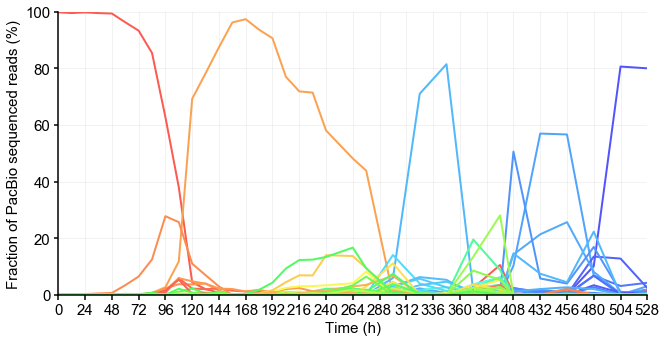

In [146]:
out_fn = results_dir + f'pacbio_ground_truth.pdf'
title = 'PacBio ground truth'

df = true_df

true_times = [s for s in true_df.columns if s != 'Abbrev genotype']
idx_to_time = {str(idx): t for idx, t in enumerate(true_times)}

# filter_num = 15
# print(f'Plotting only gt trajectories: top {filter_num}. Trimming {len(df)} ...')
# df['max fq'] = df.apply('max', axis = 'columns')
# df = df.sort_values(by = 'max fq', ascending = False)
# df = df.iloc[:filter_num]
# print(f'Trimmed to {len(df)} gts.')
# df = df.drop(columns = ['max fq'])

melt_df = df.melt(
    id_vars = 'Abbrev genotype',
    var_name = 'Time',
    value_name = 'Frequency (%)',
)
melt_df['Frequency (%)'] *= 100

gts = sorted(list(set(df['Abbrev genotype'])))
# colors = sns.color_palette('hls', int(len(gts) * 1.5))
colors = sns.hls_palette(n_colors = int(len(gts) * 1.5), s = 0.95, l = 0.65)
master_palette = {gt: color for gt, color in zip(gts, colors)}

#
import matplotlib
matplotlib.rc('font', family = 'Arial', size = 15)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
#

fig, ax = plt.subplots(figsize = (9.5, 5))

sns.lineplot(
    x = 'Time',
    y = 'Frequency (%)',
    hue = 'Abbrev genotype',
    palette = master_palette,
    ci = None,
    data = melt_df,
    linewidth = 2,
    ax = ax,
)
# plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
ax.get_legend().remove()
# plt.xticks(rotation = 90)
plt.grid(alpha = 0.2)
plt.ylim(bottom = 0, top = 100)
plt.xlim(left = 0, right = 528)
plt.xticks(np.arange(0, 528 + 24, 24))
plt.xlabel('Time (h)')
plt.ylabel('Fraction of PacBio sequenced reads (%)')

# if title != '':
#     plt.title(title)

plt.tight_layout()

##

sns.despine(trim = True)
ax.tick_params(length = 4.5, color = 'black', width = 1.5)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1.5)
    ax.spines[axis].set_color('black')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

print(f'Saving to {out_fn} ...')
plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

plt.show()
plt.close()
##

## any

In [143]:
def plot_inferred_trajectories(modelexp = 'modelexp_illumina', model_id = '0', out_fn = '', title = ''):
    prj_dir = '/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/out/_fitness_from_reads_pt_multi/'
    df = pd.read_csv(f'{prj_dir}/{modelexp}/model_{model_id}/_final_genotype_matrix.csv', index_col = 0)
    df = df.rename(columns = idx_to_time)
    
    df['Abbrev genotype'] = df.index
    df = df.reset_index(drop = True)
    
    melt_df = df.melt(
        id_vars = 'Abbrev genotype',
        var_name = 'Time',
        value_name = 'Frequency (%)',
    )
    melt_df['Frequency (%)'] *= 100
    
    melt_df['Time'] = melt_df['Time'].astype(int)
    melt_df = melt_df.sort_values(by = 'Time', ascending = True)
    
    #
    import matplotlib
    matplotlib.rc('font', family = 'Arial', size = 15)
    matplotlib.rcParams['mathtext.fontset'] = 'custom'
    matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
    #
    
    fig, ax = plt.subplots(figsize = (9.5, 5))

    gts = sorted(list(set(df['Abbrev genotype'])))
    colors = sns.color_palette('hls', int(len(gts) * 1.5))
    palette = {gt: master_palette[gt] if gt in master_palette else '#b6b9bc' for gt in gts}
    #     for gt in gts:
    #         if gt not in master_palette:
    #             print(gt)
    
    sns.lineplot(
        x = 'Time',
        y = 'Frequency (%)',
        hue = 'Abbrev genotype',
        palette = palette,
        ci = None,
        data = melt_df,
#         linewidth = 1.5,
        linewidth = 2,
        ax = ax,
    )
    # plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
    ax.get_legend().remove()
    plt.xticks(rotation = 90)
    plt.grid(alpha = 0.2)
    plt.ylim(bottom = 0, top = 100)
    plt.xlim(left = 0, right = 528)
    plt.xticks(np.arange(0, 528 + 24, 24))
    plt.xlabel('Time (h)')
    plt.ylabel('Fraction of sequenced reads (%)')
    
    # if title != '':
    #     plt.title(title)
    
    plt.tight_layout()

    ##

    sns.despine(trim = True)
    ax.tick_params(length = 4.5, color = 'black', width = 1.5)
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(1.5)
        ax.spines[axis].set_color('black')

    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42

    print(f'Saving to {out_fn} ...')
    plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

    plt.show()
    plt.close()
    ##
    
    return


Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/inferred_trajectories/ill_rl1_rs0.pdf ...


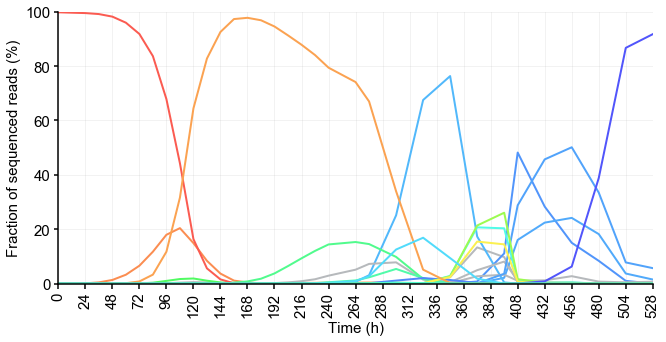

In [144]:
plot_inferred_trajectories(
    modelexp = 'modelexp_illumina', 
    model_id = '0', 
    out_fn = results_dir + 'ill_rl1_rs0.pdf', 
    title = '',
)

Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/inferred_trajectories/ill_rl100_rs0.pdf ...


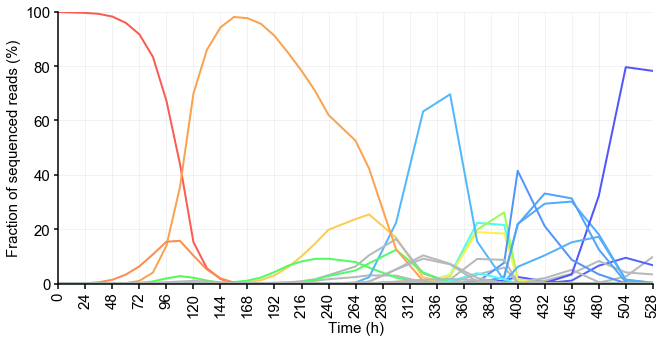

In [145]:
plot_inferred_trajectories(
    modelexp = 'modelexp_illumina', 
    model_id = '10', 
    out_fn = results_dir + 'ill_rl100_rs0.pdf', 
    title = '',
)

Saving to  ...


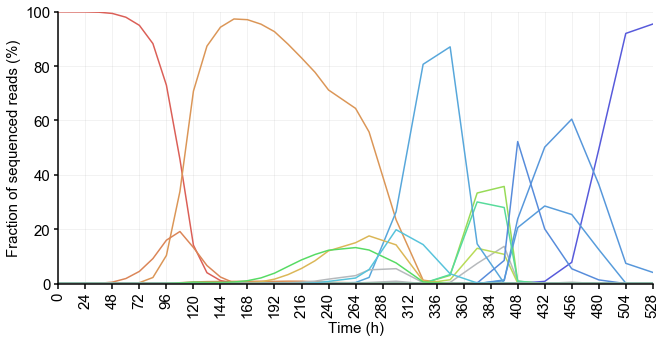

In [127]:
plot_inferred_trajectories(
    modelexp = 'unnamed', 
    model_id = '5', 
    out_fn = '', 
    title = 'test_multi times, fixed wt'
)

## test: construct inputs for R ggmuller

In [4]:
tdfm = true_df.melt(id_vars = 'Abbrev genotype', var_name = 'Generation', value_name = 'Population')
tdfm = tdfm.rename(columns = {'Abbrev genotype': 'Identity'})
tdfm.head()

tdfm.to_csv('ggmuller/pacbio_fqmat.csv')

In [5]:
# Calculate hamming distance adjacency matrix for phylogeny

def hamming_dist(x, y):
    return sum([bool(a != b) for a, b in zip(x, y)])

n = len(true_df)
gts = true_df['Abbrev genotype']

adj_mat = np.zeros((n, n))
for idx in range(n):
    for jdx in range(idx, n):
        dist = hamming_dist(gts[idx], gts[jdx])
        adj_mat[idx][jdx] = dist
        adj_mat[jdx][idx] = dist
        
# Set diagonal to large num
for idx in range(n):
    adj_mat[idx][idx] = n

In [13]:
# Chose parent as min. hamming dist gt with more wild-type symbols and the highest max fq

max_fqs = np.array(list(true_df.apply('max', axis = 'columns')))
pidxs = [jdx for jdx in range(n) if adj_mat[0][jdx] == min(adj_mat[0])]

from collections import defaultdict
dd = defaultdict(list)
for idx in range(n):
    gt = gts[idx]
    if set(gt) == set('.'):
        continue
    dd['Identity'].append(gt)
    
    num_wt_symbols = gt.count('.')
    
    min_dist = min(adj_mat[idx])
    parent_idxs = [jdx for jdx in range(n) if adj_mat[idx][jdx] == min_dist]
    
    cand_parent_idxs = [pidx for pidx in parent_idxs if gts[pidx].count('.') >= num_wt_symbols]
    if len(cand_parent_idxs) > 0:
        parent_idxs = cand_parent_idxs
    else:
        pass
    
    highest_fq_idx = np.argmax(max_fqs[parent_idxs])
    parent_idx = parent_idxs[highest_fq_idx]
    parent = gts[parent_idx]
    
    dd['Parent'].append(parent)
    
phylogeny_df = pd.DataFrame(dd)
phylogeny_df.tail()

phylogeny_df.to_csv('ggmuller/pacbio_phylo.csv')

In [14]:
[s for s in set(phylogeny_df['Identity']) if s not in set(tdfm['Identity'])]

[]

In [15]:
[s for s in set(tdfm['Identity']) if s not in set(phylogeny_df['Identity'])]

['...................']

## stacked barplot

In [19]:
tdfs = true_df.set_index('Abbrev genotype')

In [20]:
tdfs

,0,12,24,36,48,60,72,84,96,108,...,324,348,372,396,408,432,456,480,504,528
Abbrev genotype,,,,,,,,,,,,,,,,,,,,,
VIWS.DNGE.I.YC.KS.L,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003802,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101351,0.806228,0.800000
VIW..DNGE.I.YC.KS.L,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.023715,0.006780,0.000000,0.067568,0.031142,0.042424
VIW...N.ERI.YC.KSKL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.102767,0.569492,0.566372,0.067568,0.000000,0.030303
VIWS..NGE.I.YC.KS.L,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003953,0.003390,0.000000,0.135135,0.128028,0.024242
VIWS.DNGE.I.YC.KSKL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018182
VIW...N.ERI.YC.KS.L,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003802,0.000000,...,0.022727,0.006623,0.000000,0.000000,0.142292,0.213559,0.256637,0.081081,0.003460,0.018182
VIWS..N.E.I.YC.KS.L,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.006623,0.000000,0.000000,0.000000,0.000000,0.000000,0.067568,0.003460,0.012121
...................,0.997783,0.995227,0.997519,0.995098,0.993506,0.962712,0.933014,0.854167,0.627376,0.379679,...,0.000000,0.000000,0.024390,0.105263,0.003953,0.000000,0.008850,0.000000,0.003460,0.012121
VIW...NGE.I.YC.KS.L,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.505929,0.057627,0.039823,0.168919,0.010381,0.006061


In [53]:
xs = list(tdfs.columns)
ys = [list(tdfs.iloc[idx]) for idx in range(len(tdfs))]

gts = list(tdfs.index)

sorted_gts = sorted(gts)
colors = sns.color_palette('hls', int(len(sorted_gts) * 1.5))
master_palette = {gt: color for gt, color in zip(sorted_gts, colors)}
stack_colors = [master_palette[gt] for gt in gts]

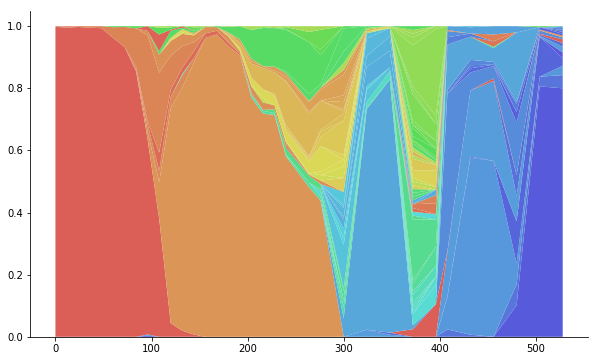

In [54]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.stackplot(
    xs,
    ys,
    labels = gts,
    colors = stack_colors,
)
# plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
# ax.get_legend().remove()
sns.despine()

plt.show()
plt.close()

## stacked bar plot - preds

In [34]:
modelexp = 'modelexp_illumina'
model_id = '10' 
title = 'Illumina, read length 100, random seed 0'

prj_dir = '/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/out/_fitness_from_reads_pt_multi/'
pred_df = pd.read_csv(f'{prj_dir}/{modelexp}/model_{model_id}/_final_genotype_matrix.csv', index_col = 0)
pred_df = pred_df.rename(columns = idx_to_time)

pred_df['Abbrev genotype'] = pred_df.index
pred_df = pred_df.reset_index(drop = True)

pred_df.head()

,0,12,24,36,48,60,72,84,96,108,...,348,372,396,408,432,456,480,504,528,Abbrev genotype
0,0.998744,0.997418,0.996003,0.992213,0.982169,0.958716,0.916731,0.834686,0.673513,0.440347,...,0.000160,0.000230,0.000156,0.000094,0.000084,0.000149,0.000062,0.000047,0.000068,...................
1,0.000009,0.000014,0.000016,0.000017,0.000020,0.000029,0.000038,0.000061,0.000128,0.000306,...,0.000750,0.000565,0.000263,0.000131,0.000110,0.000190,0.000078,0.000054,0.000074,VI..........YC.....
2,0.000001,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000003,0.000004,...,0.000438,0.008573,0.080521,0.391190,0.211387,0.101100,0.054693,0.006480,0.000490,VIW...NGE.I.YC.KS.L
3,0.000007,0.000011,0.000012,0.000012,0.000014,0.000017,0.000020,0.000023,0.000037,0.000050,...,0.683403,0.176300,0.021600,0.003056,0.000224,0.000120,0.000107,0.000060,0.000054,VIW...N.E.I.YC.KS.L
4,0.000008,0.000013,0.000015,0.000013,0.000018,0.000024,0.000030,0.000034,0.000057,0.000079,...,0.000628,0.000392,0.000214,0.000163,0.000119,0.000169,0.000084,0.000057,0.000069,VIW...N.....YC.KS.L


In [35]:
pdfs = pred_df.set_index('Abbrev genotype')

In [42]:
xs = list(pdfs.columns)
ys = [list(pdfs.iloc[idx]) for idx in range(len(pdfs))]

gts = list(pdfs.index)

# Use same palette as pacbio
stack_colors = [master_palette[gt] if gt in master_palette else 'gray' for gt in gts]

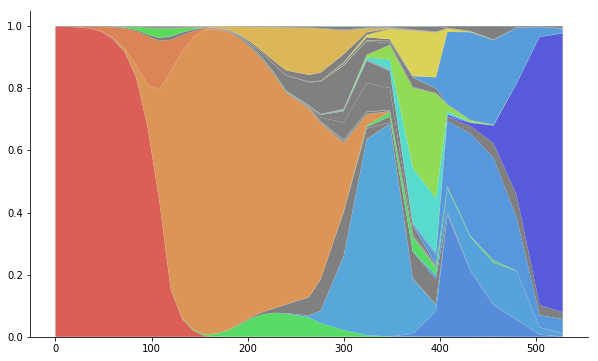

In [52]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.stackplot(
    xs,
    ys,
    labels = gts,
    colors = stack_colors,
)
# plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
# ax.get_legend().remove()
sns.despine()

plt.show()
plt.close()